In [1]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import numpy as np
import random

In [2]:
num_inputs = 2 # 2个特征参数
num_examples = 1000 # 1000个样本数据
true_w = [2, -3.4] # 真实特征
true_b = 8.8 # 偏置

In [3]:
# 使用上述参数生成期望为1的正态分布数据
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
lables = true_w[0]*features[:, 0] + true_w[1]*features[:, 1] + true_b
noise = nd.random.normal(scale=1, shape=lables.shape)
lables += noise

In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

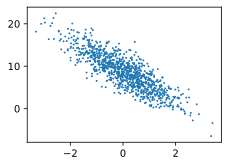

In [5]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), lables.asnumpy(), 1)
plt.show()

In [6]:
# 数据生成器，每个批次10个数据
def data_iter(batch_size, features, lables):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), lables.take(j)

In [7]:
batch_size = 10

# for X, y in data_iter(batch_size, features, lables):
#     print(X, y)
#     break

In [8]:
# 初始化变量w, b
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

w1 = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b1 = nd.zeros(shape=(1,))

In [9]:
w.attach_grad()
b.attach_grad()

w1.attach_grad()
b1.attach_grad()

In [16]:
# 定义线性回归函数
def linreg(X, w, b):
    return nd.dot(X, w) + b

# 平方误差函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# 梯度下降
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [17]:
lr = 0.03 # 学习率
num_epochs = 10 # 周期数
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, lables):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), lables)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.502717
epoch 2, loss 0.501717
epoch 3, loss 0.502638
epoch 4, loss 0.503523
epoch 5, loss 0.502771
epoch 6, loss 0.501874
epoch 7, loss 0.502611
epoch 8, loss 0.502369
epoch 9, loss 0.501632
epoch 10, loss 0.502201


In [18]:
print(true_w, w)
print(true_b, b)

[2, -3.4] 
[[ 2.023551 ]
 [-3.3791711]]
<NDArray 2x1 @cpu(0)>
8.8 
[8.819204]
<NDArray 1 @cpu(0)>


In [19]:
# 尝试非分批次训练

lr = 0.03 # 学习率
num_epochs = 1000 # 周期数
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    with autograd.record():
        y_hat = net(features, w1, b1)
        l = loss(y_hat, lables)
    l.backward()
    sgd([w1, b1], lr, num_examples)
    train_l = loss(net(features, w1, b1), lables)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().asnumpy()))  

epoch 1, loss 0.501452
epoch 2, loss 0.501452
epoch 3, loss 0.501452
epoch 4, loss 0.501452
epoch 5, loss 0.501452
epoch 6, loss 0.501452
epoch 7, loss 0.501452
epoch 8, loss 0.501452
epoch 9, loss 0.501452
epoch 10, loss 0.501452
epoch 11, loss 0.501452
epoch 12, loss 0.501452
epoch 13, loss 0.501452
epoch 14, loss 0.501452
epoch 15, loss 0.501452
epoch 16, loss 0.501452
epoch 17, loss 0.501452
epoch 18, loss 0.501452
epoch 19, loss 0.501452
epoch 20, loss 0.501452
epoch 21, loss 0.501452
epoch 22, loss 0.501452
epoch 23, loss 0.501452
epoch 24, loss 0.501452
epoch 25, loss 0.501452
epoch 26, loss 0.501452
epoch 27, loss 0.501452
epoch 28, loss 0.501452
epoch 29, loss 0.501452
epoch 30, loss 0.501452
epoch 31, loss 0.501452
epoch 32, loss 0.501452
epoch 33, loss 0.501452
epoch 34, loss 0.501452
epoch 35, loss 0.501452
epoch 36, loss 0.501452
epoch 37, loss 0.501452
epoch 38, loss 0.501452
epoch 39, loss 0.501452
epoch 40, loss 0.501452
epoch 41, loss 0.501452
epoch 42, loss 0.501452
e

epoch 380, loss 0.501452
epoch 381, loss 0.501452
epoch 382, loss 0.501452
epoch 383, loss 0.501452
epoch 384, loss 0.501452
epoch 385, loss 0.501452
epoch 386, loss 0.501452
epoch 387, loss 0.501452
epoch 388, loss 0.501452
epoch 389, loss 0.501452
epoch 390, loss 0.501452
epoch 391, loss 0.501452
epoch 392, loss 0.501452
epoch 393, loss 0.501452
epoch 394, loss 0.501452
epoch 395, loss 0.501452
epoch 396, loss 0.501452
epoch 397, loss 0.501452
epoch 398, loss 0.501452
epoch 399, loss 0.501452
epoch 400, loss 0.501452
epoch 401, loss 0.501452
epoch 402, loss 0.501452
epoch 403, loss 0.501452
epoch 404, loss 0.501452
epoch 405, loss 0.501452
epoch 406, loss 0.501452
epoch 407, loss 0.501452
epoch 408, loss 0.501452
epoch 409, loss 0.501452
epoch 410, loss 0.501452
epoch 411, loss 0.501452
epoch 412, loss 0.501452
epoch 413, loss 0.501452
epoch 414, loss 0.501452
epoch 415, loss 0.501452
epoch 416, loss 0.501452
epoch 417, loss 0.501452
epoch 418, loss 0.501452
epoch 419, loss 0.501452


epoch 756, loss 0.501452
epoch 757, loss 0.501452
epoch 758, loss 0.501452
epoch 759, loss 0.501452
epoch 760, loss 0.501452
epoch 761, loss 0.501452
epoch 762, loss 0.501452
epoch 763, loss 0.501452
epoch 764, loss 0.501452
epoch 765, loss 0.501452
epoch 766, loss 0.501452
epoch 767, loss 0.501452
epoch 768, loss 0.501452
epoch 769, loss 0.501452
epoch 770, loss 0.501452
epoch 771, loss 0.501452
epoch 772, loss 0.501452
epoch 773, loss 0.501452
epoch 774, loss 0.501452
epoch 775, loss 0.501452
epoch 776, loss 0.501452
epoch 777, loss 0.501452
epoch 778, loss 0.501452
epoch 779, loss 0.501452
epoch 780, loss 0.501452
epoch 781, loss 0.501452
epoch 782, loss 0.501452
epoch 783, loss 0.501452
epoch 784, loss 0.501452
epoch 785, loss 0.501452
epoch 786, loss 0.501452
epoch 787, loss 0.501452
epoch 788, loss 0.501452
epoch 789, loss 0.501452
epoch 790, loss 0.501452
epoch 791, loss 0.501452
epoch 792, loss 0.501452
epoch 793, loss 0.501452
epoch 794, loss 0.501452
epoch 795, loss 0.501452


In [20]:
print(true_w, w1)
print(true_b, b1)

[2, -3.4] 
[[ 1.990188 ]
 [-3.3976288]]
<NDArray 2x1 @cpu(0)>
8.8 
[8.824037]
<NDArray 1 @cpu(0)>
